### Imports

In [ ]:
import pandas as pd
import os

### Directories

In [ ]:
root_dir = os.path.dirname(os.getcwd())
data_dir = os.path.join(root_dir, 'data')

In [39]:
num_generics_path = os.path.join(data_dir, 'gx_num_generics.csv')
package_path = os.path.join(data_dir, 'gx_num_generics.csv')
panel_paht = os.path.join(data_dir, 'gx_panel.csv')
therapeutic_area_path = os.path.join(data_dir, 'therapeutic_area.csv')
volume_path = os.path.join(data_dir, 'gx_volume.csv')

### Read data

In [40]:
volume = pd.read_csv(volume_path, index_col=0)

### EDA

In [78]:
print(volume.shape)
print(volume.head())

(94954, 5)
     country    brand      volume  month_num month_name
1  country_1  brand_3  18509088.6        -88        Jul
2  country_1  brand_3  19697508.0        -87        Aug
3  country_1  brand_3  18315721.8        -86        Sep
4  country_1  brand_3  19831199.4        -85        Oct
5  country_1  brand_3  18593281.8        -84        Nov


In [79]:
volume.describe()

,volume,month_num
count,9.495400e+04,94954.000000
mean,7.288071e+07,-30.983287
std,1.041108e+09,34.773676
min,0.000000e+00,-137.000000
25%,9.025609e+05,-54.000000
50%,4.861060e+06,-26.000000
75%,2.078613e+07,-3.000000
max,6.041151e+10,23.000000


In [76]:
#Total number of medicaments
volume.brand.nunique()

484

### Plots

In [58]:
ind = (volume.brand == 'brand_20') & (volume.country == 'country_1')
brand_20 = volume.loc[ind, :]
brand_20.head()

,country,brand,volume,month_num,month_name
464,country_1,brand_20,884.08,-131,Jul
465,country_1,brand_20,827.54,-130,Aug
466,country_1,brand_20,704.18,-129,Sep
467,country_1,brand_20,848.10,-128,Oct
468,country_1,brand_20,976.60,-127,Nov


<AxesSubplot:xlabel='month_num'>

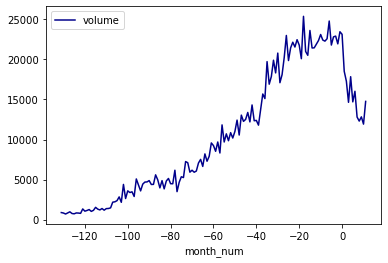

In [75]:
brand_20.plot.line(x='month_num',y='volume',c='DarkBlue')

In [74]:
min_values = volume.groupby(['country', 'brand'], as_index=False)['month_num'].min()
print(min_values)
min_values.groupby(['brand'], as_index=False).count().sort_values(by='month_num', ascending=False)

        country      brand  month_num
0     country_1   brand_10        -47
1     country_1  brand_102        -55
2     country_1  brand_115        -54
3     country_1  brand_117        -66
4     country_1  brand_119        -66
...         ...        ...        ...
1073  country_8   brand_87        -34
1074  country_8   brand_92       -102
1075  country_9  brand_167        -32
1076  country_9  brand_187        -98
1077  country_9  brand_477        -53

[1078 rows x 3 columns]


,brand,country,month_num
97,brand_187,13,13
419,brand_477,10,10
75,brand_167,9,9
38,brand_133,9,9
177,brand_259,8,8
...,...,...,...
125,brand_211,1,1
126,brand_212,1,1
278,brand_35,1,1
127,brand_213,1,1


<AxesSubplot:xlabel='month_num'>

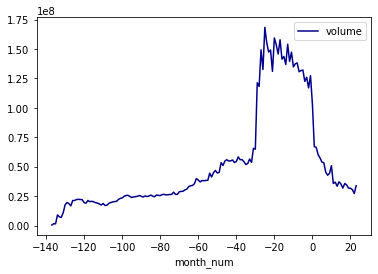

In [99]:
mean_df = volume.groupby(['month_num'], as_index=False)['volume'].mean()
mean_df.plot.line(x='month_num',y='volume',c='DarkBlue')